In [533]:
from builtins import print

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

# Mono & Poly & Organic $\lambda$ as a function of $V$

In [534]:
db_mono = pd.read_csv("wav_mono.csv", delimiter="\t")
print(db_mono)

   wavelength      V      Verr
0         400  1.563  0.002236
1         495  1.547  0.002236
2         550  1.523  0.002236
3         610  1.488  0.002236
4         715  1.372  0.002236
5         780  0.820  0.002236
6         850  0.345  0.002236


In [535]:
db_poly = pd.read_csv("wav_poly.csv", delimiter="\t")
print(db_poly)

   wavelength      V      Verr
0         400  4.715  0.002236
1         495  4.589  0.002236
2         550  4.425  0.002236
3         610  3.919  0.002236
4         715  1.992  0.002236
5         780  0.740  0.002236
6         850  0.205  0.002236


In [536]:
db_org = pd.read_csv("wav_org.csv", delimiter="\t")
print(db_org)

   wavelength      V      Verr
0         400  1.340  0.002236
1         495  1.307  0.002236
2         550  1.263  0.002236
3         610  1.112  0.002236
4         715  0.271  0.002236
5         780  0.009  0.002236
6         850  0.003  0.002236


In [537]:
rcParams.update({'font.size': 22})

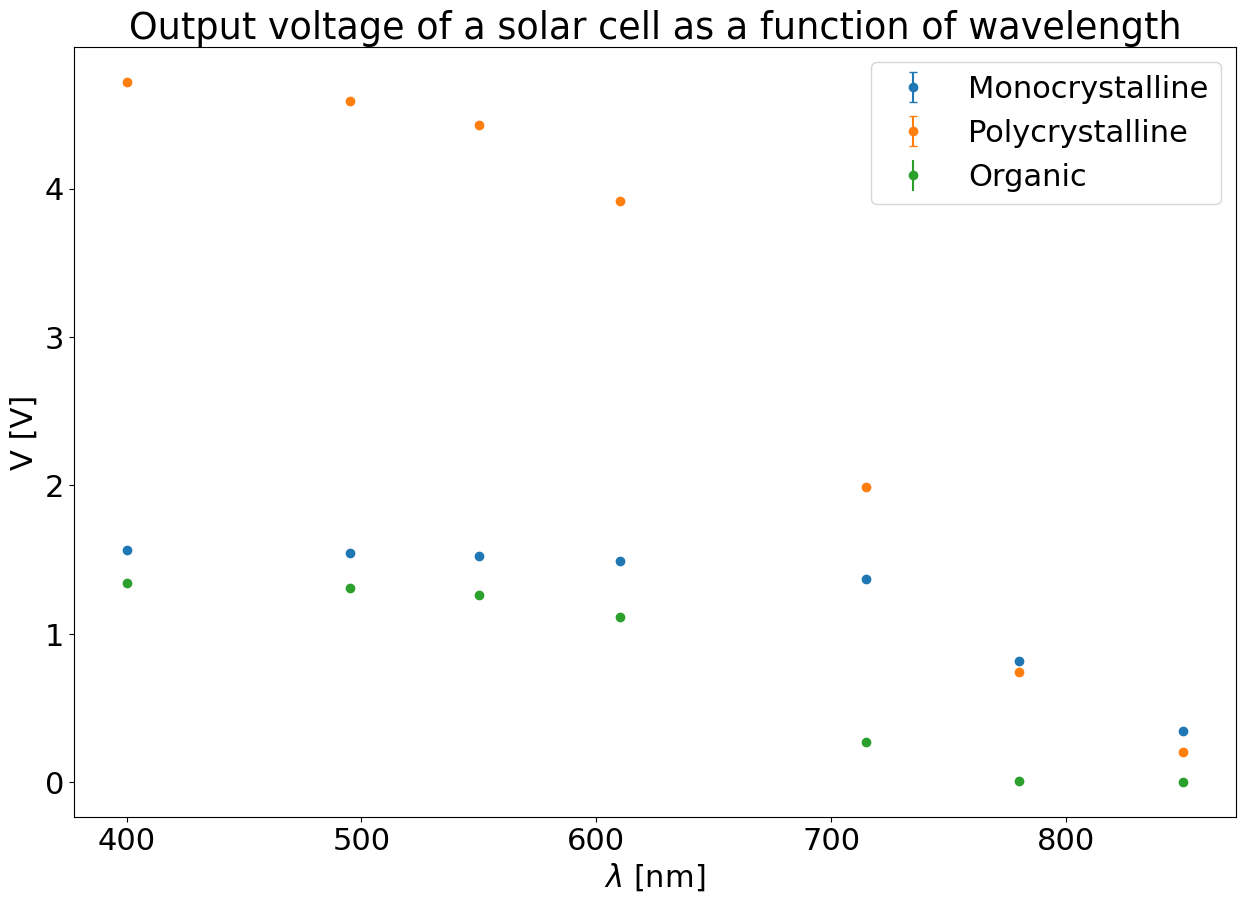

In [538]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.errorbar(db_mono["wavelength"], db_mono["V"], yerr=db_mono["Verr"], label="Monocrystalline", fmt="o", capsize=3)
ax.errorbar(db_poly["wavelength"], db_poly["V"], yerr=db_poly["Verr"], label="Polycrystalline", fmt="o", capsize=3)
ax.errorbar(db_org["wavelength"], db_org["V"], yerr=db_org["Verr"], label="Organic", fmt="o")
ax.legend()
ax.set_title("Output voltage of a solar cell as a function of wavelength")
ax.set_ylabel(f"V [V]")
ax.set_xlabel(f"$\lambda$ [nm]")
plt.savefig("results_wavelength.png")
plt.show()

# Mono & Poly $\eta$ as a function of $T$

In [539]:
db_poly = pd.read_csv("eff_poly.csv", delimiter="\t")
print(db_poly)

    Efficeincy (%)   Eff_Err  Temp (K)  Temp_Err  Power_Err  Power(W)  \
0         3.745757  0.334520    359.85  3.651370   0.000043  0.012592   
1         4.248547  0.380436    348.85  0.955249   0.000105  0.014282   
2         4.757627  0.424717    341.70  4.201190   0.000037  0.015994   
3         4.779727  0.427695    332.70  2.302173   0.000105  0.016068   
4         5.057512  0.451483    326.25  0.657647   0.000038  0.017002   
5         5.163217  0.461154    323.65  1.154340   0.000063  0.017357   
6         5.323599  0.475229    320.10  0.905539   0.000039  0.017896   
7         5.205989  0.464746    316.40  0.223607   0.000041  0.017501   
8         5.510731  0.491931    312.40  0.141421   0.000040  0.018525   
9         5.572939  0.497484    308.60  0.316228   0.000041  0.018734   
10        6.548167  0.584550    279.05  0.559017   0.000049  0.022013   
11        6.635959  0.592374    281.10  0.223607   0.000048  0.022308   
12        6.461382  0.576790    282.40  0.141421   

In [540]:
db_mono = pd.read_csv("eff_mono.csv", delimiter="\t")
print(db_mono)

    Efficeincy (%)   Eff_Err  Temp (K)  Temp_Err  Power_Err  Power(W)  \
0         0.528732  0.053934    370.80  5.200961   0.000008  0.001247   
1         0.434251  0.044232    355.50  3.501428   0.000004  0.001024   
2         1.367694  0.139255    345.00  3.001666   0.000007  0.003225   
3         1.554805  0.158301    334.80  2.202272   0.000007  0.003666   
4         1.613957  0.164330    325.20  1.403567   0.000008  0.003805   
5         3.037603  0.309247    321.30  0.316228   0.000010  0.007162   
6         2.128537  0.216704    315.75  0.269258   0.000008  0.005018   
7         3.718148  0.378595    311.20  0.806226   0.000011  0.008768   
8         8.243569  0.839345    278.15  0.657647   0.000041  0.019435   
9         8.469888  0.862482    281.35  0.559017   0.000052  0.019969   
10        7.557180  0.768786    284.00  0.364005   0.000022  0.017804   
11        8.072238  0.820010    286.00  0.269258   0.000019  0.018991   
12        8.105668  0.825333    288.00  0.223607   

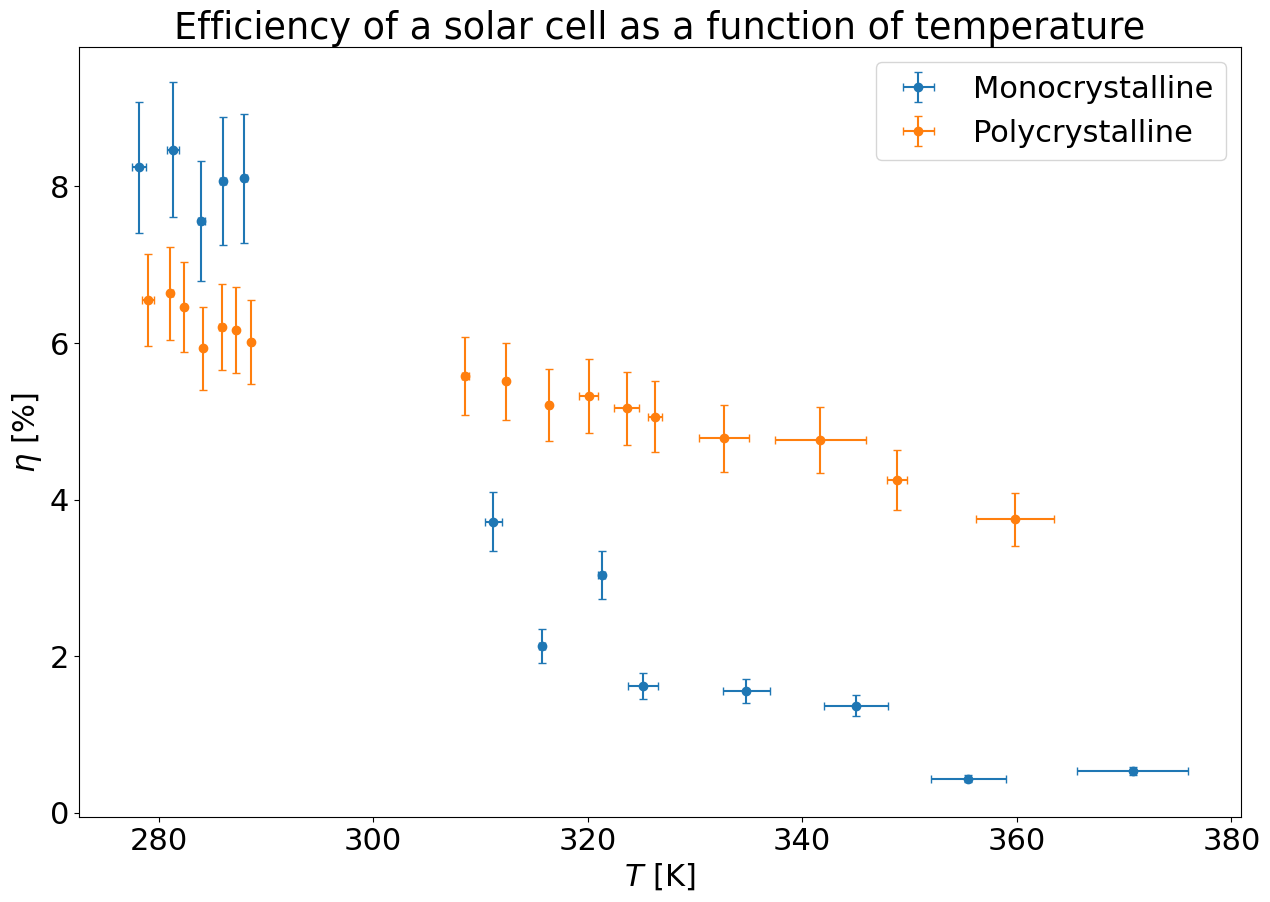

In [541]:
# regular plot of efficiencies
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.errorbar(db_mono["Temp (K)"], db_mono["Efficeincy (%)"], xerr=db_mono["Temp_Err"], yerr=db_mono["Eff_Err"], label="Monocrystalline", fmt="o", capsize=3)
ax.errorbar(db_poly["Temp (K)"], db_poly["Efficeincy (%)"],xerr=db_poly["Temp_Err"], yerr=db_poly["Eff_Err"], label="Polycrystalline", fmt="o", capsize=3)

ax.legend()
ax.set_title("Efficiency of a solar cell as a function of temperature")
ax.set_ylabel(f"$\eta$ [%]")
ax.set_xlabel(f"$T$ [K]")
plt.savefig("result_efficiency.png")
plt.show()

In [542]:
# # Binning the data for a bar plot
bin_edges = [278, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380]
bin_labels = [f"{bin_edges[i]}K-{bin_edges[i+1]}K" for i in range(len(bin_edges)-1)]

# Use cut to assign bins
db_mono['Temp Bins'] = pd.cut(db_mono["Temp (K)"], bins=bin_edges, labels=bin_labels, right=False)
db_poly['Temp Bins'] = pd.cut(db_poly["Temp (K)"], bins=bin_edges, labels=bin_labels, right=False)

# If a value +- error spans multiple bins, make it attribute to all of them
def find_overlapping_bins(temp, error, bin_edges):
    overlapping_bins = []
    overlap = (temp - error < bin_edges[0])
    for i in range(len(bin_edges)-1):
        bin_start, bin_end = bin_edges[i], bin_edges[i+1]
        
        if bin_start <= temp - error < bin_end:
            overlap = True
        if overlap:
            overlapping_bins.append(f"{bin_start}K-{bin_end}K")
        if bin_start <= temp + error < bin_end:
            overlap = False
    return overlapping_bins

def expand_bin(db, bin_labels, bin_edges):
    # Expand the DataFrame to include rows for each overlapping bin
    expanded_data = []
    for bin_label in bin_labels:
        # Make sure every bin is present at least once
        expanded_data.append({'Temp Bins': bin_label, 'Efficeincy (%)': np.nan, 'Eff_Err': np.nan})
        
    for index, row in db.iterrows():
        overlapping_bins = find_overlapping_bins(row["Temp (K)"], row['Temp_Err'], bin_edges)
        for bin in overlapping_bins:
            expanded_data.append({'Temp Bins': bin, 'Efficeincy (%)': row['Efficeincy (%)'], 'Eff_Err': row['Eff_Err']})
    return pd.DataFrame(expanded_data)

expanded_mono = expand_bin(db_mono, bin_labels, bin_edges)
expanded_poly = expand_bin(db_poly, bin_labels, bin_edges)

# Calculate average efficiency + error for each bin
eff_bins_mono = expanded_mono.groupby('Temp Bins')[['Efficeincy (%)', "Eff_Err"]].mean().reset_index()
eff_bins_poly = expanded_poly.groupby('Temp Bins')[['Efficeincy (%)', "Eff_Err"]].mean().reset_index()


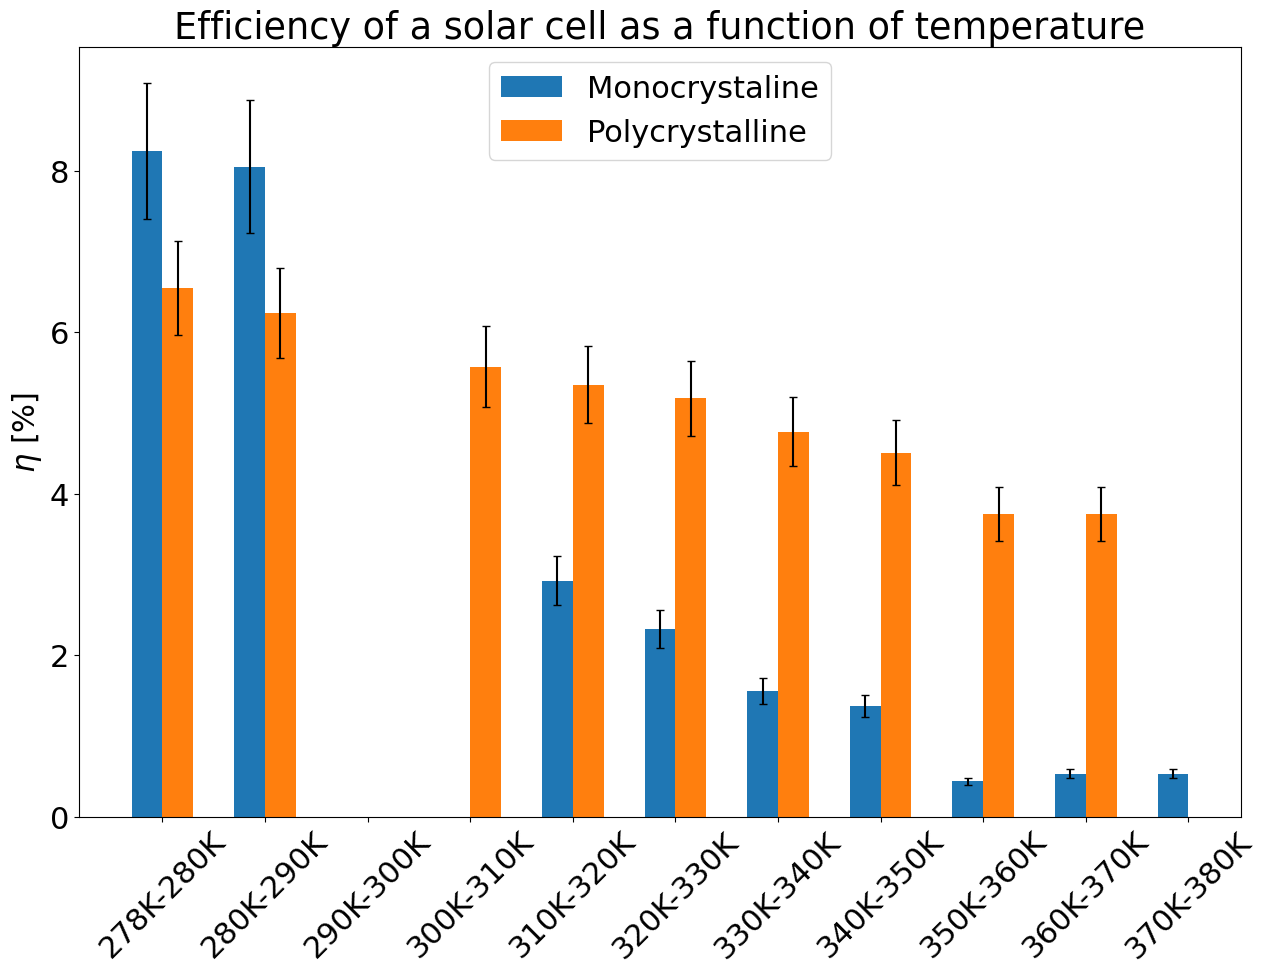

In [543]:
# Bar plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

width = 0.3
pos = np.arange(len(bin_edges)-1)

ax.bar(pos - width/2, eff_bins_mono["Efficeincy (%)"], width, yerr=eff_bins_mono["Eff_Err"], capsize=3, label="Monocrystaline")
ax.bar(pos + width/2, eff_bins_poly["Efficeincy (%)"], width, yerr=eff_bins_poly["Eff_Err"], capsize=3, label="Polycrystalline")

ax.legend()
ax.set_xticks(pos)
ax.set_xticklabels(bin_labels, rotation=45)
ax.set_title("Efficiency of a solar cell as a function of temperature")
ax.set_ylabel(f"$\eta$ [%]")
plt.savefig("results_efficiency_bar.png")
plt.show()

In [544]:
# Region < 290K
db_mono_small = db_mono[db_mono["Temp (K)"] <= 295]
db_poly_small = db_poly[db_poly["Temp (K)"] <= 295]

bin_edges = [278, 280, 282, 284, 286, 288, 290]
bin_labels = [f"{bin_edges[i]}K-{bin_edges[i+1]}K" for i in range(len(bin_edges)-1)]

expanded_mono_small = expand_bin(db_mono_small, bin_labels, bin_edges)
expanded_poly_small = expand_bin(db_poly_small, bin_labels, bin_edges)

eff_bins_mono_small = expanded_mono_small.groupby('Temp Bins')[['Efficeincy (%)', "Eff_Err"]].mean().reset_index()
eff_bins_poly_small = expanded_poly_small.groupby('Temp Bins')[['Efficeincy (%)', "Eff_Err"]].mean().reset_index()


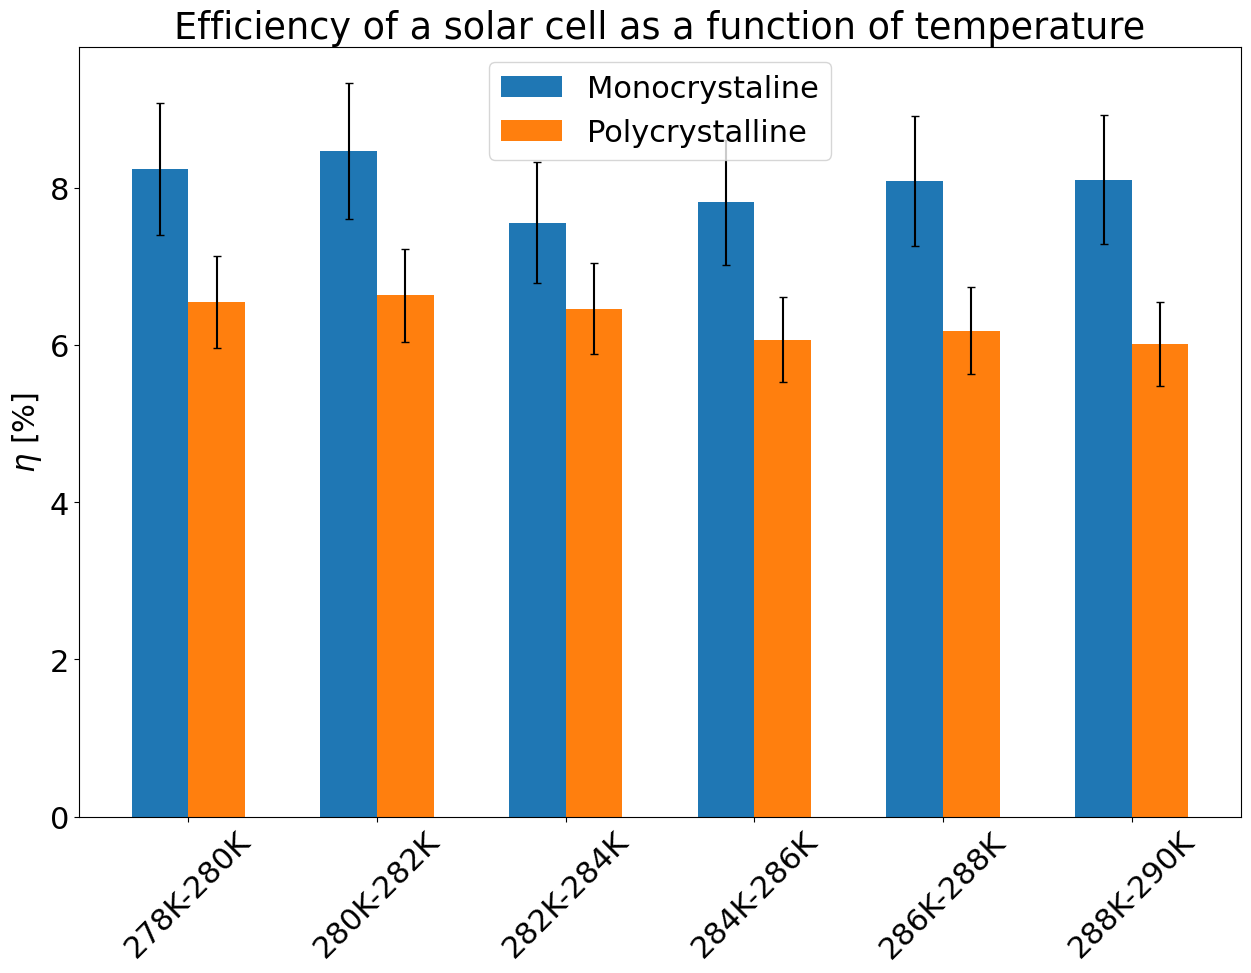

In [545]:
# Bar plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

width = 0.3
pos = np.arange(len(bin_edges)-1)

ax.bar(pos - width/2, eff_bins_mono_small["Efficeincy (%)"], width, yerr=eff_bins_mono_small["Eff_Err"], capsize=3, label="Monocrystaline")
ax.bar(pos + width/2, eff_bins_poly_small["Efficeincy (%)"], width, yerr=eff_bins_poly_small["Eff_Err"], capsize=3, label="Polycrystalline")

ax.legend()
ax.set_xticks(pos)
ax.set_xticklabels(bin_labels, rotation=45)
ax.set_title("Efficiency of a solar cell as a function of temperature")
ax.set_ylabel(f"$\eta$ [%]")
plt.savefig("results_efficiency_bar_small.png")
plt.show()

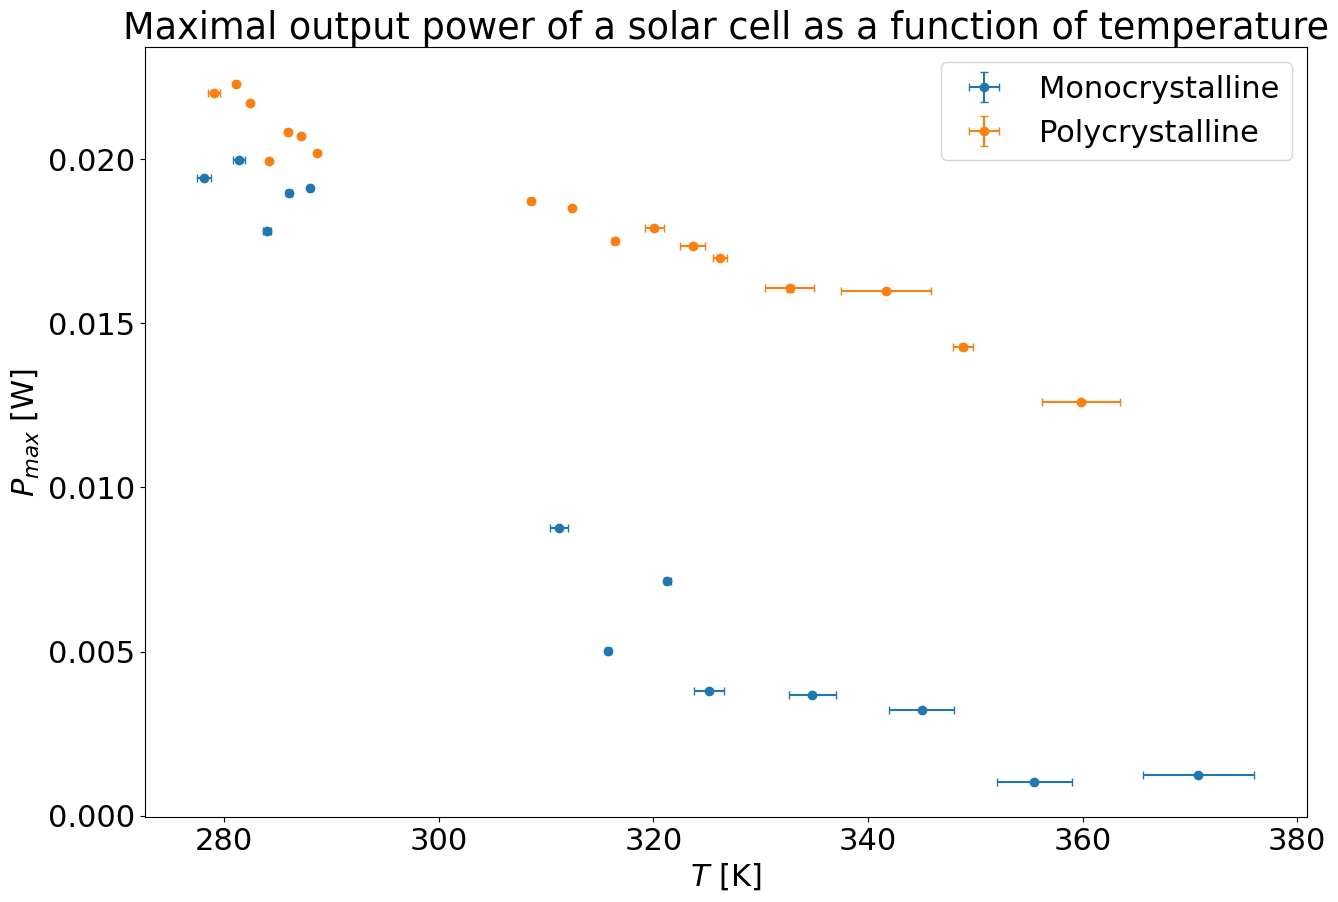

In [546]:
# regular plot of power vs temp.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.errorbar(db_mono["Temp (K)"], db_mono["Power(W)"], xerr=db_mono["Temp_Err"], yerr=db_mono["Power_Err"], label="Monocrystalline", fmt="o", capsize=3)
ax.errorbar(db_poly["Temp (K)"], db_poly["Power(W)"],xerr=db_poly["Temp_Err"], yerr=db_poly["Power_Err"], label="Polycrystalline", fmt="o", capsize=3)

ax.legend()
ax.set_title(f"Maximal output power of a solar cell as a function of temperature")
ax.set_ylabel(f"$P_{{max}}$ [W]")
ax.set_xlabel(f"$T$ [K]")
plt.savefig("results_power.png")
plt.show()